## Used Libraries

In [61]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


import pickle

In [2]:
df = pd.read_csv('../dataset/CC GENERAL.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Berdasarkan output terdapat 8950 entries data dengan 18 kolom. Dari 18 kolom tersebut, 2 kolom di antaranya masih memiliki missing value, yaitu `MINIMUM_PAYMENTS` dan `CREDIT_LIMIT`.

## Data Cleaning

In [4]:
df.duplicated().sum()

0

Berdasarkan output, tidak terdapat duplikasi data.

In [5]:
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [6]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.452292,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
df = df.drop('CUST_ID', axis=1)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.452292,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
df['PRC_FULL_PAYMENT'].unique()

array([0.      , 0.222222, 1.      , 0.25    , 0.083333, 0.3     ,
       0.333333, 0.166667, 0.111111, 0.916667, 0.2     , 0.090909,
       0.454545, 0.181818, 0.444444, 0.636364, 0.5     , 0.75    ,
       0.142857, 0.888889, 0.545455, 0.818182, 0.363636, 0.833333,
       0.666667, 0.909091, 0.1     , 0.583333, 0.8     , 0.416667,
       0.4     , 0.125   , 0.714286, 0.6     , 0.571429, 0.375   ,
       0.9     , 0.285714, 0.7     , 0.272727, 0.777778, 0.875   ,
       0.727273, 0.428571, 0.625   , 0.857143, 0.555556])

## Exploratory Data Analysis

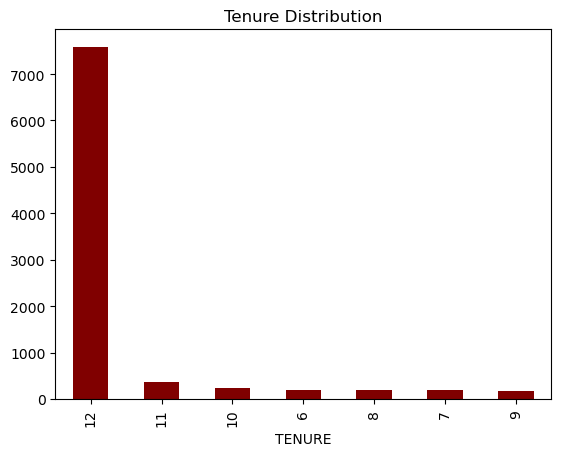

In [10]:
df['TENURE'].value_counts().plot.bar(color='maroon')
plt.title('Tenure Distribution')
plt.show()

Berdasarkan output dapat dilihat bahwa pengguna lebih banyak memilih pembayaran layanan kartu kredit (tenure) selama 12 bulan dibandingkan yang lainnya.

## Credit Limit vs. Balance based on Tenure 12

/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Credit Limit vs Balance')

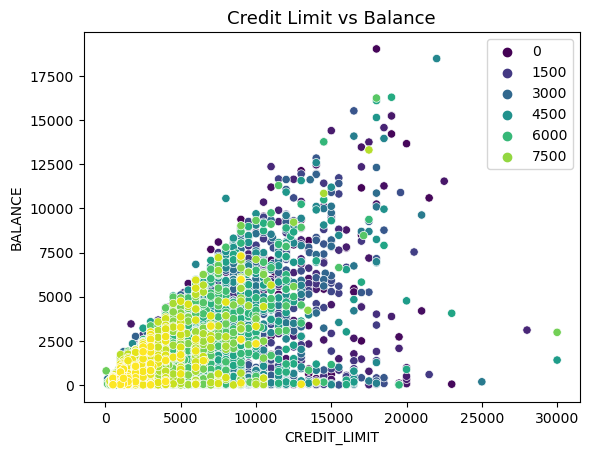

In [11]:
sns.scatterplot(x='CREDIT_LIMIT', y='BALANCE', data=df,  hue=df.index, palette='viridis')
sns.set_style("whitegrid")
plt.title("Credit Limit vs Balance", fontsize= 13)

##  Purchases Amount vs. Total Transaction

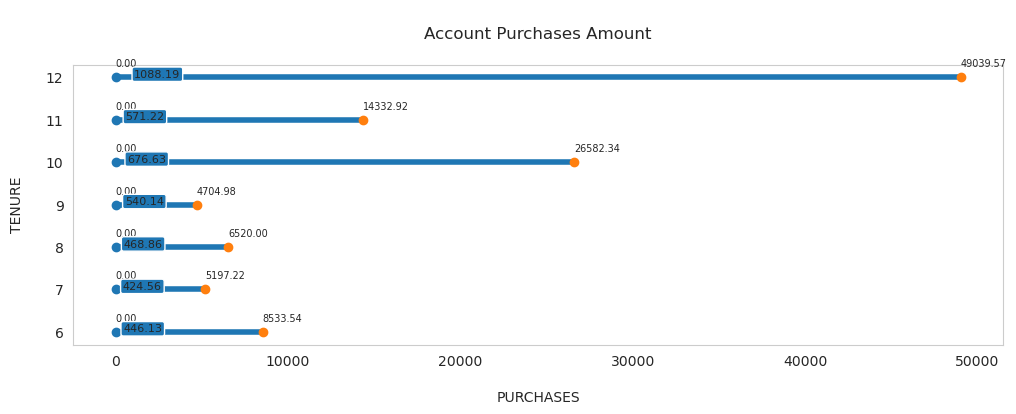

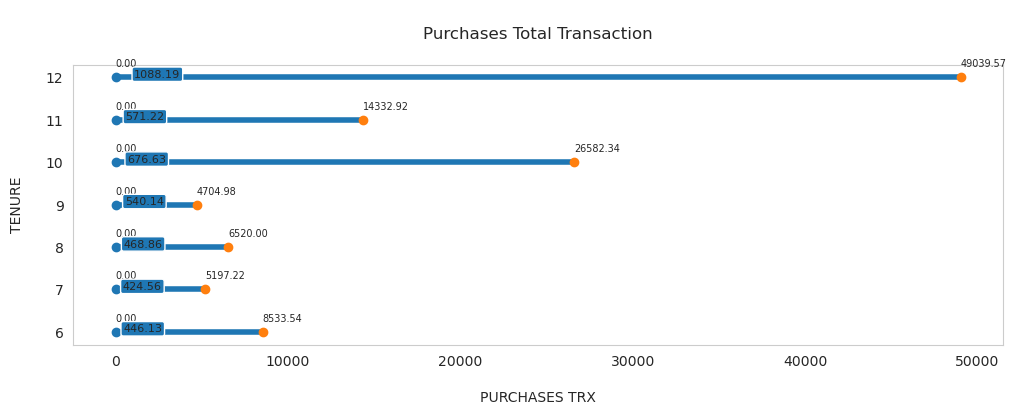

In [12]:

plt.figure(figsize=(12,8))

plt.subplot(2, 1, 1)
eda = df[['PURCHASES', 'TENURE']]
eda = eda.groupby('TENURE').agg(MIN=('PURCHASES', 'min'), AVG=('PURCHASES', 'mean'), MAX=('PURCHASES', 'max')).reset_index()
tenure = sorted(df['TENURE'].unique())
min_sct = plt.scatter(x=eda['MIN'], y=eda['TENURE'])
max_sct = plt.scatter(x=eda['MAX'], y=eda['TENURE'])
for i in range(len(tenure)):
    eda_x = eda[eda['TENURE']==tenure[i]]
    plt.hlines(y=eda_x['TENURE'], xmin=eda_x['MIN'], xmax=eda_x['MAX'], linewidth=4, zorder=0)
    plt.annotate('{0:.2f}'.format(eda_x['MIN'].values[0]), xy=(eda_x['MIN'].values[0], eda_x['TENURE'].values[0]+0.25), fontsize=7)
    plt.annotate('{0:.2f}'.format(eda_x['AVG'].values[0]), xy=(eda_x['AVG'].values[0], eda_x['TENURE'].values[0]), fontsize=8, bbox=dict(boxstyle='round', pad=0.2))
    plt.annotate('{0:.2f}'.format(eda_x['MAX'].values[0]), xy=(eda_x['MAX'].values[0], eda_x['TENURE'].values[0]+0.25), fontsize=7)
#for spine in axs_left.spines.values():
#    spine.set_color('None')
plt.xlabel('\nPURCHASES')
plt.ylabel('TENURE\n')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0)
plt.grid(axis='x', which='major')
plt.title('\nAccount Purchases Amount\n')
plt.show()

plt.figure(figsize=(12,8))
plt.subplot(2, 1, 2)
tenure = sorted(df['TENURE'].unique())
min_sct = plt.scatter(x=eda['MIN'], y=eda['TENURE'])
max_sct = plt.scatter(x=eda['MAX'], y=eda['TENURE'])
for i in range(len(tenure)):
    eda_x = eda[eda['TENURE']==tenure[i]]
    plt.hlines(y=eda_x['TENURE'], xmin=eda_x['MIN'], xmax=eda_x['MAX'], linewidth=4, zorder=0)
    plt.annotate('{0:.2f}'.format(eda_x['MIN'].values[0]), xy=(eda_x['MIN'].values[0], eda_x['TENURE'].values[0]+0.25), fontsize=7)
    plt.annotate('{0:.2f}'.format(eda_x['AVG'].values[0]), xy=(eda_x['AVG'].values[0], eda_x['TENURE'].values[0]), fontsize=8, bbox=dict(boxstyle='round', pad=0.2))
    plt.annotate('{0:.2f}'.format(eda_x['MAX'].values[0]), xy=(eda_x['MAX'].values[0], eda_x['TENURE'].values[0]+0.25), fontsize=7)
#for spine in axs_left.spines.values():
#    spine.set_color('None')
plt.xlabel('\nPURCHASES TRX')
plt.ylabel('TENURE\n')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0)
plt.grid(axis='x', which='major')
plt.title('\nPurchases Total Transaction\n')
plt.show()

/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Credit Limit vs. Installment Purchases')

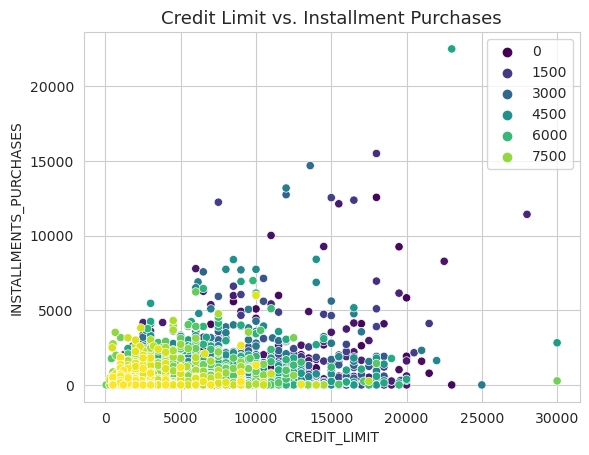

In [13]:
sns.scatterplot(y='INSTALLMENTS_PURCHASES', x='CREDIT_LIMIT', data=df,  hue=df.index, palette='viridis')
sns.set_style("whitegrid")
plt.title("Credit Limit vs. Installment Purchases", fontsize= 13)

## Correlation Map

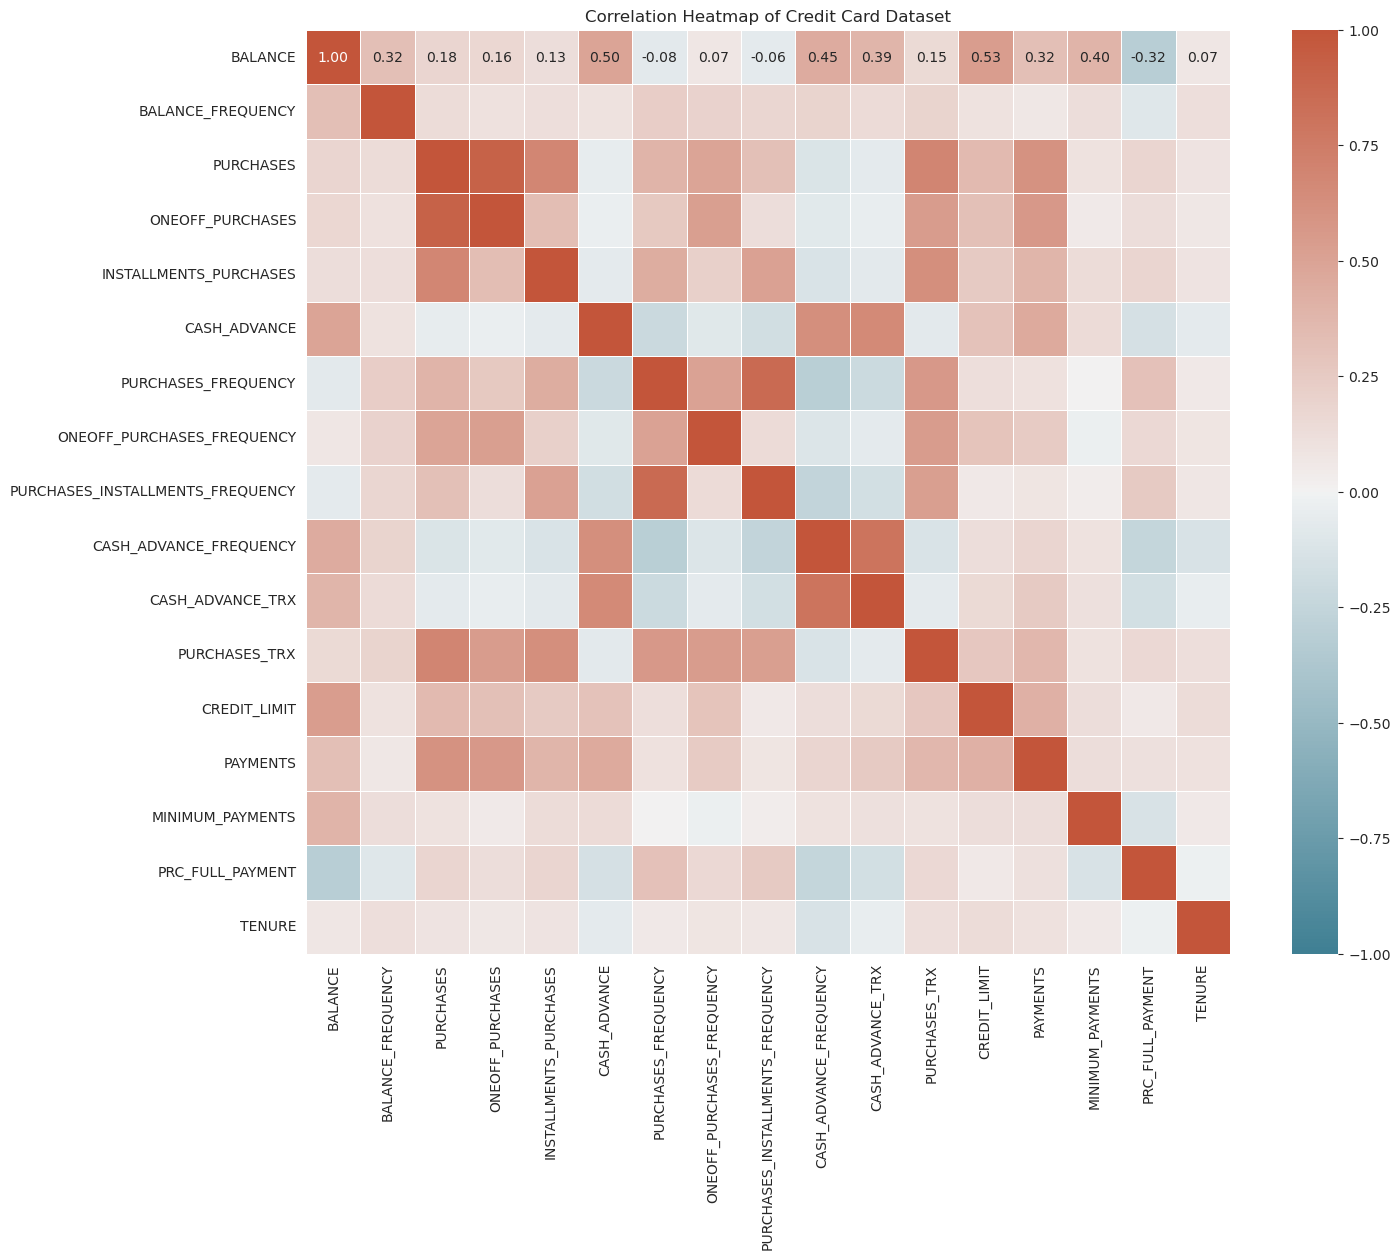

In [14]:
correlation = df.corr()

plt.figure(figsize=(16, 12))
plt.title('Correlation Heatmap of Credit Card Dataset')
cmap = sns.diverging_palette(220, 20, as_cmap=True)
heatmap = sns.heatmap(correlation, annot=True, fmt='.2f', cmap=cmap, vmax=1, vmin=-1, square=True, linewidths=.5)
plt.show()


Berdasarkan heatmap di atas fitur yang berkolerasi tinggi adalah sebagai berikut:
- `PURCHASES` dengan `ONEOFF_PURCHASES` (0.92)
- `PURCHASES_INSTALLMENT_FREQUENCY` dengan `PURCHASES_FREQUENCY` (0,86)
- `CASH_ADVANCE_TRX` dengan `CASH_ADVANCE_FRQUENCY` (0,8)


# Preprocessing

In [15]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,845.003358,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2332.905284,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,312.452292,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [16]:
# Membuat objek MinMaxScaler
scaler = MinMaxScaler()

# Melakukan penskalaan fitur dan menyimpan hasilnya pada variabel baru
df_scaled = scaler.fit_transform(df)

In [17]:
df_scaled[0]

array([0.00214779, 0.818182  , 0.00194537, 0.        , 0.00424   ,
       0.        , 0.166667  , 0.        , 0.083333  , 0.        ,
       0.        , 0.00558659, 0.03171953, 0.00397863, 0.00182565,
       0.        , 1.        ])

# Define Model

## K-Means

In [31]:
# Specify the number of components (number of dimensions after PCA)
n_components = 2

pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df_scaled)


In [22]:
data_pca=pd.DataFrame(data=principal_components, columns=['pca1','pca2'])
data_pca.head()

,pca1,pca2
0,-0.482269,-0.097884
1,-0.608709,-0.019549
2,0.304349,0.921073
3,-0.588699,-0.005678
4,-0.554502,0.052616


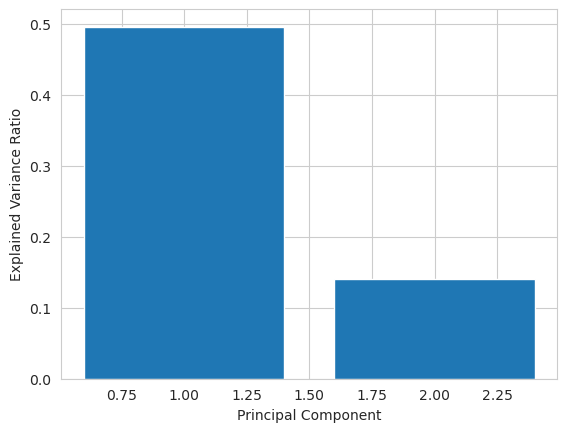

In [23]:
# Plot the explained variance for each principal component
plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()


In [78]:
wcss = []
for i in range(2,12):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(principal_components)
   wcss.append(model.inertia_)
   print("Silhouette Coefficient for num_cluster",i, silhouette_score(principal_components, model.labels_))
   
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.xticks([1, 2, 3, 4, 5,6,7,8,9,10])
plt.ylabel('WCSS')
plt.show()

/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [73]:
k = 6
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(principal_components)
print("Silhouette Coefficient for num_cluster", silhouette_score(principal_components, model.labels_))

/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Coefficient for num_cluster 0.17806447525803312


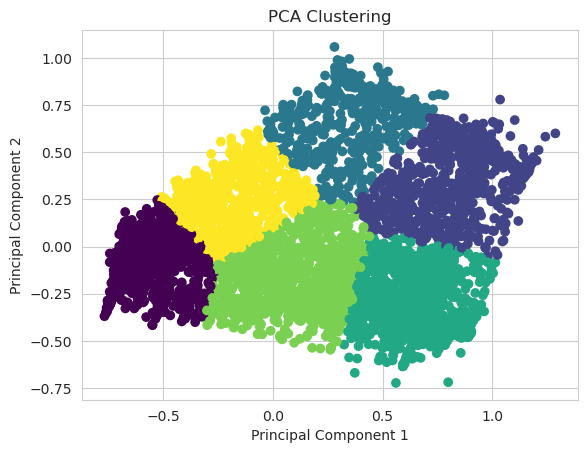

In [74]:
# Visualize the clusters in 2D space
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Clustering')
plt.show()

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

In [75]:
# Tentukan parameter DBSCAN (eps: radius tetangga, min_samples: jumlah tetangga minimum)
eps_value = 0.5
min_samples_value = 5

# Inisialisasi dan fit DBSCAN model
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
clusters = dbscan.fit_predict(principal_components)


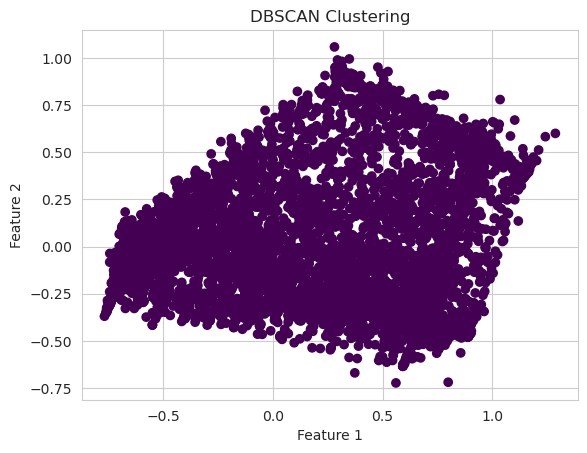

In [76]:
# Visualisasi hasil clustering
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()